In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('data/Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Data Review and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Total charges has the object datatype but it is numerical data.

In [11]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [14]:
missing_data = pd.DataFrame({'no of nulls': df.isna().sum(), 'mean of nulls': df.isna().mean()})
missing_data

,no of nulls,mean of nulls
CustomerID,0,0.000000
Count,0,0.000000
Country,0,0.000000
State,0,0.000000
City,0,0.000000
Zip Code,0,0.000000
Lat Long,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Gender,0,0.000000


About 73% (5174) of values in the `Churn Reason` column is missing data.

In [16]:
df['Churn Label'].value_counts(normalize=True)

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

We see that about 73% of customers have the Churn Label 'No' so they do not need a Churn Reason.

In [17]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

A couple of values(11) in the `Total Charges` column is also missing data.

In [18]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


Since we have the `Tenure Months` and `Monthly Charges` columns, we can calculate `Total Charges = Tenure Months * Monthly Charges` to replace the null values for these rows.

In [19]:
df['Total Charges'].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)

## Cardinality

In [20]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

Low cardinality:
- `Count` column
- `Country` column
- `State` column

High cardinality:
- `Customer ID` column
- `Zip Code` column

# Visualisation

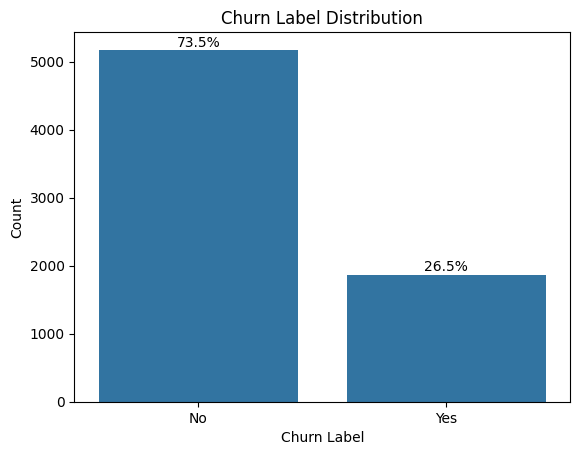

In [23]:
churn_label_counts = df['Churn Label'].value_counts()
churn_label_percent = df['Churn Label'].value_counts(normalize=True) * 100

sns.barplot(x=churn_label_counts.index, y=churn_label_counts.values)
for i, (count, percent) in enumerate(zip(churn_label_counts.values, churn_label_percent.values)):
    plt.text(i, count + 50, f'{percent:.1f}%', ha='center')
plt.title('Churn Label Distribution')
plt.ylabel('Count')
plt.xlabel('Churn Label')
plt.show()

`26.5%` of customers have stopped using our service. The task is to know which type of customers are more likely to stop using our service and what actions we can take.

In [32]:
values = df['Churn Reason'].value_counts(ascending=False).values
keys = df['Churn Reason'].value_counts(ascending=False).keys()

fig = px.bar(x=keys, y=values, color = values, text = values)

fig.update_layout(
    yaxis_title="Churn Reason",
    xaxis_title="Count"
)
fig.show()

**The bar plot shows that customers reason for churning can be divided into two categories:**
- **Internal:** Those within the companies control. E.g., service/product quality, pricing, offering fit
- **External:** Those outside the companies control. E.g., competitive pull, life events (moved, deceased)

**Actions to take:**
- To address the top 3 reasons, the company should mainly focus on improving service quality, product reliability and offer more value to customers.
- Improving customer support is important as it is the main cause of churn. E.g., training agents on empathy + first call resolution and adding QA on high-churn intents.
- Monitor competitor pricing weekly and auto-generate counter-offers for at-risk customers. Should work towards bundle value (streaming, cloud storage, device perks) rather than pure price matching.

## Let's look at the possible factors

### City

In [64]:
city_churn = (
    df.groupby('City')
      .agg(
          total_customers=('CustomerID', 'count'),
          churners=('Churn Label', lambda x: (x == 'Yes').sum())
      )
      .reset_index()
)

# drop rows where churners is 0
city_churn = city_churn[city_churn['churners'] > 0]
city_churn['churn_rate'] = (city_churn['churners'] / city_churn['total_customers']).round(2)
city_churn.drop(columns=['churners'], inplace=True)
city_churn.rename(columns={'City': 'city', 'total_customers': 'count'}, inplace=True)

city_churn = city_churn.sort_values(by='count', ascending=False)

city_churn.head(5)

,city,count,churn_rate
562,Los Angeles,305,0.30
869,San Diego,150,0.33
878,San Jose,112,0.26
855,Sacramento,108,0.24
872,San Francisco,104,0.30


In [60]:
fig = px.bar(city_churn.head(20), x='city', y='count', title='City Counts', text='count')
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Count"
)
fig.show()

We see that the city with the largest amount of customers is Los Angeles with 305 followed by San Diego with 150.

In [71]:
fig = px.bar(city_churn.sort_values(by='churn_rate', ascending=True).head(30),
             x='city', y= 'churn_rate', title='Churn Rate by City (ascending)', text ='churn_rate', color='churn_rate')
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Churn Rate"
)
fig.show()

In [72]:
fig = px.bar(city_churn.sort_values(by='churn_rate', ascending=False).head(30),
             x='city', y= 'churn_rate', title='Churn Rate by City (descending)', text ='churn_rate', color='churn_rate')
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Churn Rate"
)
fig.show()

### Latitude and Longitude

In [75]:
loc_churn = (
    df.groupby(['Latitude', 'Longitude'])
      .agg(
          total_customers=('CustomerID', 'count'),
          churners=('Churn Label', lambda x: (x == 'Yes').sum())
      )
      .reset_index()
)

loc_churn = loc_churn[loc_churn['churners'] > 0]
loc_churn['churn_rate'] = (loc_churn['churners'] / loc_churn['total_customers']).round(2)
loc_churn.drop(columns=['churners'], inplace=True)

loc_churn = loc_churn.sort_values(by='total_customers', ascending=False)
loc_churn.rename(columns={'total_customers': 'count'}, inplace=True)

loc_churn.head()

,Latitude,Longitude,count,churn_rate
0,32.555828,-117.040073,5,0.2
384,34.038983,-117.991372,5,0.6
398,34.050198,-118.210946,5,0.2
397,34.049841,-118.338460,5,0.2
393,34.048013,-118.293953,5,0.2


In [78]:
fig = px.scatter_map(loc_churn,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['count'], map_style='open-street-map',
                        color="count"
        )
fig.show()

In [80]:
fig = px.scatter_map(loc_churn,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['churn_rate'], map_style='open-street-map',
                        color="churn_rate"
        )
fig.show()

### Tenure Months

In [82]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label", title='Churn Distribution Across Customer Tenure')
fig.show()

Churn is highest among customers with very short tenures (0–6 months), indicating early dissatisfaction or poor onboarding. In contrast, long-tenured customers (50+ months) show much lower churn, suggesting that retention improves significantly once customers are established.

In [84]:
bins = [-0.1, 1, 6, 12, 24, 48, 72, 120]
labels = ["0-1", "2-6", "7-12", "13-24", "25-48", "49-72", "73+"]

df["_tenure_bucket"] = pd.cut(df['Tenure Months'], bins=bins, labels=labels)
rate = (df.groupby("_tenure_bucket")["Churn Value"]
          .mean().rename("churn_rate").reset_index())

fig = px.bar(rate, x="_tenure_bucket", y="churn_rate",
             title="Churn Rate by Tenure Bucket",
             labels={"_tenure_bucket":"Tenure bucket","churn_rate":"Churn rate"})
fig.update_yaxes(tickformat=".0%")
fig.show()

C:\Users\jason\AppData\Local\Temp\ipykernel_11436\813091017.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



The likelihood of churn is highest in the early months (61% for 0–1 month, 47% for 2–6 months) and decreases steadily with tenure, reaching below 10% for customers who stay beyond 4 years.

In [85]:
fig = px.box(df, x='Churn Label', y='Tenure Months', points="outliers",
             title="Tenure Distribution by Churn Outcome",
             labels={'Churn Label':"Churn", 'Tenure Months':"Tenure (months)"})
fig.show()

So we see that customer tenure has a clear effect on churn: the risk of leaving is much higher in the first few months then steadily decreases as customers become more loyal. This indicates that churn is largely an `early-life-cycle` problem.

To reduce churn, telcos should (instead of pouring resources into purely marketing) improve the onboarding experience, offer early incentives and provide proactive support for the first 6-12 months. By stabilizing the relationship during this critical window, more customers are likely to transition into long-term and low churn customers. 

### Contract Type

In [87]:
Contract_Label_counts= df['Contract'].value_counts()
fig1 = px.pie(names= Contract_Label_counts.keys(), values= Contract_Label_counts.values, title='Contract Distribution')
fig1.show()

In [90]:
contract_churn = (
    df.groupby('Contract')['Churn Label']
      .value_counts(normalize=True)
      .round(2)
      .rename('normalized_count')
      .reset_index()
)
contract_churn

,Contract,Churn Label,normalized_count
0,Month-to-month,No,0.57
1,Month-to-month,Yes,0.43
2,One year,No,0.89
3,One year,Yes,0.11
4,Two year,No,0.97
5,Two year,Yes,0.03


In [95]:
fig = px.bar(contract_churn, x='normalized_count', y='Contract', color='Churn Label',
             title='Stacked Bar Chart by Contract and Churn Label', text= 'normalized_count',
             labels={'normalized_count': 'Percentage'})
fig.update_xaxes(tickformat=".0%")
fig.show()

Month-to-month contracts clearly have the highest churn rate (43%) while those with one year (11%) or two year (3%) contracts are far less likely to churn. Longer contracts clearly provide stability and stronger customer retention.

In [96]:
fig = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
            names='Contract',
            facet_col = 'Churn Label',
            title = 'Churn rate by contract type')
            
fig.show()

The pie charts break down churners and non-churners separately. Among non-churners, customers are spread across all contract types. In contrast, nearly 89% of churners are on month-to-month contracts, confirming that short term commitments are a very likely cause for churn.